Llibreries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import matplotlib
import os
import zipfile
from PIL import Image

Descarregar dades desde github

In [0]:
!wget "https://github.com/gdsa-upc/2019-Equip1/raw/master/Dades_tb2018/tb2018_10imatges.zip" -O Dades_prova.zip

--2019-11-28 11:09:54--  https://github.com/gdsa-upc/2019-Equip1/raw/master/Dades_tb2018/tb2018_10imatges.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gdsa-upc/2019-Equip1/master/Dades_tb2018/tb2018_10imatges.zip [following]
--2019-11-28 11:09:54--  https://raw.githubusercontent.com/gdsa-upc/2019-Equip1/master/Dades_tb2018/tb2018_10imatges.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15118 (15K) [application/zip]
Saving to: ‘Dades_prova.zip’

Dades_prova.zip     100%[===================>]  14.76K  --.-KB/s    in 0.007s  

2019-11-28 11:09:54 (2.19 MB/s) - ‘Dades_prova.zip’ saved [15

Extraer el zip 

In [0]:
f = zipfile.ZipFile("Dades_prova.zip",'r')
for file in f.namelist():
    f.extract(file,"./Dades_prova/")  # Guardar en el directori /Dades_prova/
f.close()

Carregar les imatges

In [0]:
from os.path import isfile, join

# Obtener tots els fitxers a la carpeta TRAIN  
files_train = [f for f in os.listdir("./Dades_prova/train") if isfile(join("./Dades_prova/train", f))]
# Guardar imatges de train en una matriu
x_train = np.array([np.array(Image.open("./Dades_prova/train/"+file)) for file in files_train])

# Obtener tots els fitxers a la carpeta TEST
files_test = [f for f in os.listdir("./Dades_prova/test") if isfile(join("./Dades_prova/test", f))]
# Guardar imatges de test en una matriu
x_test = np.array([np.array(Image.open("./Dades_prova/test/"+file)) for file in files_test])

Visualitzem una imatge

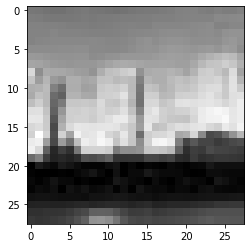

In [0]:
plt.imshow(x_train[1,:,:], cmap='gray')

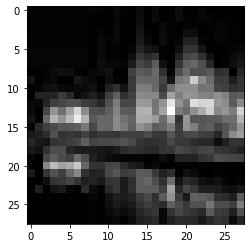

In [0]:
plt.imshow(x_test[1,:,:], cmap='gray')

Mostrar el nombre total de imatges i la mida de una imatge

In [0]:
print("x_train shape:", x_train.shape) 
print("x_test shape:", x_test.shape)

x_train shape: (10, 28, 28)
x_test shape: (10, 28, 28)


In [0]:
Num_train = len(x_train[:,1,1])     # Nombre total de les imatges
dimx_train = len(x_train[1,:,1])    # Altura de imatge
dimy_train = len(x_train[1,1,:])    # Amplada de imatge

Num_test = len(x_test[:,1,1])
dimx_test = len(x_test[1,:,1])
dimy_test = len(x_test[1,1,:])

Extracció de descriptors

In [0]:
x_train = x_train.reshape(Num_train, dimx_train*dimy_train);
print("x_train shape:", x_train.shape) 
x_test = x_test.reshape(Num_test, dimx_test*dimy_test);
print("x_test shape:", x_test.shape)


x_train shape: (10, 784)
x_test shape: (10, 784)


Normalització de descriptors

In [0]:
x_train_n = sklearn.preprocessing.normalize(x_train)
x_test_n = sklearn.preprocessing.normalize(x_test)

Calculem similituds

In [0]:
x_train_n = x_train_n.transpose()
sim = np.matmul(x_test_n, x_train_n)

In [0]:
print(sim)
print("sim shape:", sim.shape)

[[0.74979543 0.83388065 0.90975329 0.75080769 0.86483025 0.63314037
  0.89130648 0.80367102 0.62502844 0.83628012]
 [0.58593516 0.69023594 0.67732294 0.67424079 0.65863122 0.60536654
  0.58364935 0.67496057 0.38799913 0.59664397]
 [0.79076212 0.77671929 0.79600029 0.68581257 0.86239185 0.71607261
  0.78794282 0.77206252 0.73188802 0.82794836]
 [0.74689527 0.80960126 0.90436128 0.7123364  0.82911142 0.58713544
  0.91393929 0.79972729 0.60752413 0.82140294]
 [0.73584878 0.85877633 0.86613389 0.69989783 0.8441967  0.58881158
  0.85868679 0.82709928 0.67559158 0.86781178]
 [0.67761297 0.75371512 0.80452889 0.61649386 0.77705566 0.60155442
  0.79341303 0.75869574 0.60267698 0.78076654]
 [0.66714971 0.30261747 0.58394467 0.61561478 0.55190788 0.67159052
  0.56378699 0.47050287 0.38081937 0.38211212]
 [0.7589178  0.64580745 0.78090918 0.83776717 0.74566486 0.63197008
  0.70012458 0.71169065 0.57282119 0.61822008]
 [0.84231895 0.6636373  0.72230892 0.70395584 0.77288551 0.81912886
  0.68311959

Ordenem els valors

In [0]:
ranks = np.argsort(sim, axis=1)[:,::-1]

Visualització de resultats

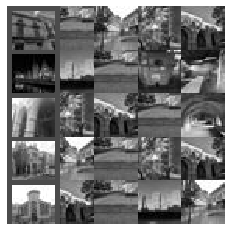

In [0]:
from PIL import Image, ImageOps

# get the original images for visualization
x_train = np.reshape(x_train, (Num_train, dimx_train, dimy_train))
x_test = np.reshape(x_test, (Num_test, dimx_test, dimy_test))

h,w = (28, 28)
new_image= Image.new('RGB', (h*5,w*5))

# Visualize ranks of the 10 queries
offset = 0 # it will show results from query #'offset' to #offset+10
for q in range(5):
  ranks_q = ranks[q*(offset+1),:]
  for i in range(5):
      new_image.paste( Image.fromarray(x_train[ranks_q[i]]), (h*(1+i),w*q ))

  # visualize query
  ima_q = Image.fromarray(x_test[q*(offset+1),...])
  ima_q = ImageOps.expand(ima_q, border=3, fill='green')

  new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()